### PART 2-  CASE STUDY HEALTHCARE DATA ANALYSIS 

#### Identify the three providers that are least similar to other providers and the the three regions that     are least similar to other region

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [2]:
Medicare_Provider_Charge_In = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
Medicare_Provider_Charge_Out = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

    The Data Analysis will be based on financial summary data from 2011 that were made availible by the centers of  Medicare and Medicaid Services
    
    Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv
    Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv

In [3]:
Medicare_Provider_Charge_In.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [4]:
Medicare_Provider_Charge_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [5]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_In)

Number of variables,12
Number of observations,163065
Total Missing (%),0.0%
Total size in memory,14.9 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [6]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_Out)

Number of variables,11
Number of observations,43372
Total Missing (%),0.0%
Total size in memory,3.6 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Based on the data profiling; 
    
####    Columns to be used to process inpatient data-
        'DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
        'Total Discharges', 'Average Covered Charges' and 'Average Total Payments'
        
####    Columns to be used to process outpatient data -
        'APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
        'Outpatient Services', 'Average  Estimated Submitted Charges' and 'Average Total Payments'       

In [7]:
Medicare_in_data = Medicare_Provider_Charge_In[['DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                              'Total Discharges', 'Average Covered Charges', 'Average Total Payments' ]]

In [8]:
Medicare_in_data.rename(columns={'DRG Definition' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Total Discharges' : 'Count_of_services', 'Average Covered Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

C:\Users\arnav\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
Medicare_out_data = Medicare_Provider_Charge_Out[['APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                                 'Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [11]:
Medicare_out_data.rename(columns={'APC' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Outpatient Services' : 'Count_of_services', 'Average  Estimated Submitted Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

In [17]:
# concating both inpaitent and outpaitent data
Medicare_data = pd.concat([Medicare_in_data, Medicare_out_data])

In [18]:
Medicare_data.head()

,Procedures,Provider Name,Provider State,Region,Count_of_services,Charges,Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [19]:
Medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count_of_services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


### Grouping data by Provider and Region 

In [23]:
# Grouping by Provider
Medicare_data_provider = Medicare_data.groupby(['Provider Name']).agg({'Procedures' :  'nunique','Provider State' : 'nunique', 'Region': 'nunique', 'Count_of_services': 'sum' , 'Charges': 'sum' , 'Payment' : 'sum'}).reset_index()                                                                
                                                                                    
                                                                                     
                                                                                   
                                                                                    

In [24]:
Medicare_data_provider.head()

,Provider Name,Procedures,Provider State,Region,Count_of_services,Charges,Payment
0,ABBEVILLE GENERAL HOSPITAL,25,1,1,1294,3.140589e+05,1.211158e+05
1,ABBOTT NORTHWESTERN HOSPITAL,121,1,1,20810,4.495572e+06,1.065439e+06
2,ABILENE REGIONAL MEDICAL CENTER,71,1,1,7285,3.613719e+06,5.165803e+05
3,ABINGTON MEMORIAL HOSPITAL,121,1,1,19300,6.832266e+06,1.027582e+06
4,ACMH HOSPITAL,54,1,1,4151,4.067190e+05,1.993325e+05


In [28]:
#Grouping by Region
Medicare_data_region = Medicare_data.groupby(['Region']).agg({'Procedures' :  'nunique','Provider State' : 'nunique','Provider Name': 'nunique','Count_of_services': 'sum' , 'Charges': 'sum' ,'Payment' : 'sum'}).reset_index()
                                                                                     
                                                                                  
                                                                                    
                                                                                     
                                                                                    

In [29]:
Medicare_data_region.head()

,Region,Procedures,Provider State,Provider Name,Count_of_services,Charges,Payment
0,AK - Anchorage,100,1,9,31406,9.427446e+06,3.390446e+06
1,AL - Birmingham,127,2,40,166237,6.836406e+07,1.464821e+07
2,AL - Dothan,122,3,10,43700,9.561883e+06,2.419670e+06
3,AL - Huntsville,125,2,8,71691,1.175407e+07,3.090570e+06
4,AL - Mobile,125,2,14,70394,1.619382e+07,4.256182e+06


In [30]:
Medicare_data_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
Provider Name        3201 non-null object
Procedures           3201 non-null int64
Provider State       3201 non-null int64
Region               3201 non-null int64
Count_of_services    3201 non-null int64
Charges              3201 non-null float64
Payment              3201 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 175.1+ KB


### Cluster Analysis at provider level to identify the providers with least similarity

    Based on the cluster analysis follwing 3 Providers stands out as least similar to other providers by K-MEANS
    Analysis
   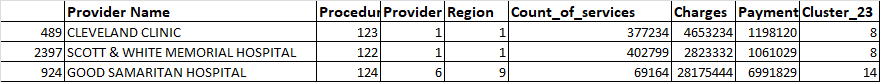


    GOOD SAMARITAN HOSPITAL - 
                                the charges for procuders are highest as compared to other providers; 
                                also it is available at 6 states and 9 regions                               
    

In [31]:
Medicare_data_provider_num = Medicare_data_provider._get_numeric_data()

In [40]:
col_num = Medicare_data_provider_num.columns
col_num

Index(['Procedures', 'Provider State', 'Region', 'Count_of_services',
       'Charges', 'Payment'],
      dtype='object')

#### Standardizing the data

In [34]:
scalor=StandardScaler()

In [35]:
Medicare_provider_scaled=scalor.fit_transform(Medicare_data_provider_num)

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Applying PCA- 3 clusters are defining 94% of data

In [37]:
from sklearn.decomposition import PCA

In [41]:

pc = PCA(n_components=6)

In [44]:

provider_pca=pc.fit(Medicare_provider_scaled)
np.cumsum(provider_pca.explained_variance_ratio_)

array([0.56461662, 0.82598703, 0.94596279, 0.98320687, 0.99707795,
       1.        ])

In [45]:
# 3 components explain 94 percent variation so selecting 3 components.
pc=PCA(n_components=3)

In [46]:
reduced_cr=pc.fit_transform(Medicare_provider_scaled)

In [47]:
reduced_cr.shape

(3201, 3)

In [48]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(3)], index=col_num)

,PC_0,PC_1,PC_2
Procedures,0.428081,-0.397857,-0.197239
Provider State,0.356879,0.591702,0.086489
Region,0.361007,0.589502,0.074693
Count_of_services,0.289998,-0.288352,0.896801
Charges,0.464627,-0.172105,-0.354212
Payment,0.509000,-0.176972,-0.135345


#### Silhouette Coefficient

In [49]:
from sklearn import metrics


In [130]:
# calculate SC for K=3 through K=30
k_range = range(3,25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [131]:
scores

[0.5648290026091711,
 0.5841443695740672,
 0.6028124689938463,
 0.5201422470203949,
 0.5229722201804041,
 0.5235640585227276,
 0.4767044932966791,
 0.4793096967776324,
 0.46646153121037204,
 0.45947686558792183,
 0.4581770881061329,
 0.4556950231843945,
 0.4345161396390521,
 0.4328798200485693,
 0.4331564394425185,
 0.42450209700050084,
 0.42432812434045064,
 0.42396499245308006,
 0.42472370171037727,
 0.41716555075813067,
 0.41556465773558676,
 0.42020528535615814]

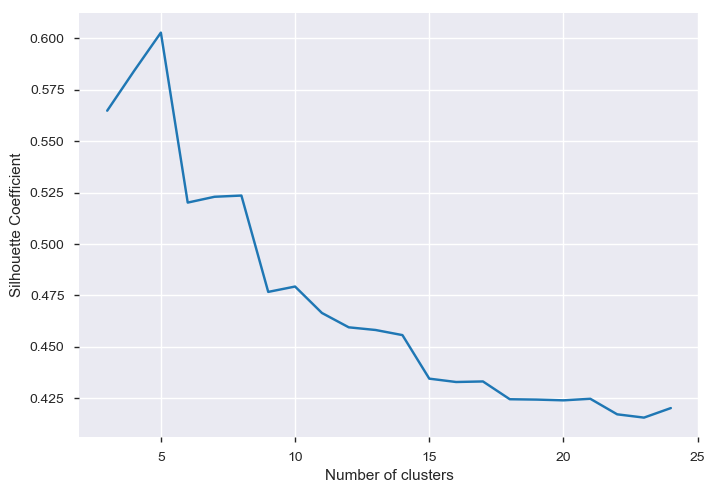

In [132]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

    We will be using Silhouette Coefficient to get the most scattered cluster i.e. least coeffient 
    to get the outliers
    
   Answer can be 23 or 24 cluster . lets see the behavior

#### For 23 cluster Solution behavior  -

In [133]:
from sklearn.cluster import KMeans

In [134]:
km_23=KMeans(n_clusters=23,random_state=123)

In [135]:
km_23.fit(reduced_cr)
km_23.labels_

array([ 1, 11, 15, ..., 12,  2, 12])

In [136]:
pd.Series(km_23.labels_).value_counts()

1     546
12    495
20    397
15    357
2     345
6     340
13    232
11    170
5      92
16     48
19     33
3      25
10     22
17     18
9      18
22     17
0      16
7      12
4       6
18      5
21      4
8       2
14      1
dtype: int64

#### Cluster 14 has 1 and cluster 8 has 2 providers .

### Cluster 24 solution behavior

In [137]:
km_24=KMeans(n_clusters=24,random_state=123)
km_24.fit(reduced_cr)
km_24.labels_

array([19, 13, 17, ...,  1, 16,  1])

In [138]:
pd.Series(km_24.labels_).value_counts()

19    547
1     517
4     417
6     353
17    343
16    269
13    214
0     159
22    106
11     91
8      32
12     31
15     25
20     23
3      22
5      21
7      12
14      5
18      4
23      3
21      2
10      2
2       2
9       1
dtype: int64

### here many clusters have 2 dots. cluster 23 solution is giving more clarity. so i will go with cluster 23 solution

Text(0.5, 0, 'PC_cluster 23')

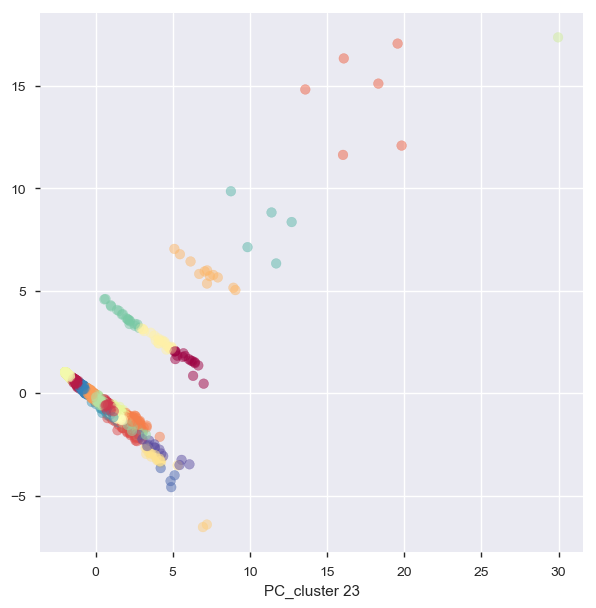

In [139]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_23.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_cluster 23')

In [90]:
cluster_df_23=pd.concat([Medicare_data_provider, pd.Series(km_23.labels_, name='Cluster_23')], axis=1)


In [91]:
cluster_df_23.to_csv('cluster_df_23_provider.csv')

## Creating the cluster at Region level to identify the region with least similarity

    
Based on the cluster analysis follwing 3 Pregions stands out as least similar to other providers by K-MEANS Analysis
    
   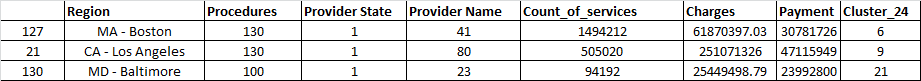
	


In [140]:
Medicare_data_region.head()

,Region,Procedures,Provider State,Provider Name,Count_of_services,Charges,Payment
0,AK - Anchorage,100,1,9,31406,9.427446e+06,3.390446e+06
1,AL - Birmingham,127,2,40,166237,6.836406e+07,1.464821e+07
2,AL - Dothan,122,3,10,43700,9.561883e+06,2.419670e+06
3,AL - Huntsville,125,2,8,71691,1.175407e+07,3.090570e+06
4,AL - Mobile,125,2,14,70394,1.619382e+07,4.256182e+06


In [141]:
Medicare_data_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
Region               306 non-null object
Procedures           306 non-null int64
Provider State       306 non-null int64
Provider Name        306 non-null int64
Count_of_services    306 non-null int64
Charges              306 non-null float64
Payment              306 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 16.8+ KB


In [142]:
Medicare_data_region_num = Medicare_data_region._get_numeric_data()

In [143]:
col_num_rg=Medicare_data_region_num.columns
col_num_rg

Index(['Procedures', 'Provider State', 'Provider Name', 'Count_of_services',
       'Charges', 'Payment'],
      dtype='object')

#### Standardizing the data

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Medicare_region_scaled=sc.fit_transform(Medicare_data_region_num)

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Applying PCA 4 component is showing 96% variability

In [145]:
pc1=PCA(n_components=6)


In [146]:
region_pca=pc1.fit(Medicare_region_scaled)
np.cumsum(region_pca.explained_variance_ratio_)

array([0.60783414, 0.77864138, 0.89424989, 0.9665519 , 0.99037865,
       1.        ])

In [147]:
# 4 components explain 96% variation 
pc_final=PCA(n_components=4)
reduced_cr_1=pc_final.fit_transform(Medicare_region_scaled)

In [148]:
reduced_cr_1.shape

(306, 4)

In [149]:
Medicare_region_scaled.shape

(306, 6)

In [150]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(4)], index=col_num_rg)

,PC_0,PC_1,PC_2,PC_3
Procedures,0.317197,0.294480,-0.859202,-0.271965
Provider State,0.117119,0.919499,0.334287,0.079286
Provider Name,0.486000,0.004980,0.219587,-0.151846
Count_of_services,0.424189,-0.090060,-0.149066,0.852557
Charges,0.467551,-0.192563,0.227669,-0.410366
Payment,0.500932,-0.150287,0.166591,-0.037931


#### Silhouette Coefficient

In [151]:
from sklearn import metrics

In [152]:
# calculate SC for K=3 through K=25
k_range = range(3, 25)
scores1 = []
for k in k_range:
    kmr = KMeans(n_clusters=k, random_state=1)
    kmr.fit(Medicare_region_scaled)
    scores1.append(metrics.silhouette_score(Medicare_region_scaled, kmr.labels_))

In [153]:
scores1

[0.31469461592842424,
 0.38723930865855855,
 0.4059540045361104,
 0.4165834247811949,
 0.3602356441277429,
 0.3736078516802558,
 0.3318186023234452,
 0.3592268423387034,
 0.3248614405219504,
 0.3087469228957531,
 0.34302864325217863,
 0.3320253561084451,
 0.35062408501838627,
 0.33524894512822456,
 0.3416901481271396,
 0.31077277206342585,
 0.318112079163691,
 0.3129355240744552,
 0.3112790703610052,
 0.2867793120200481,
 0.29308142532774006,
 0.29946411961931785]

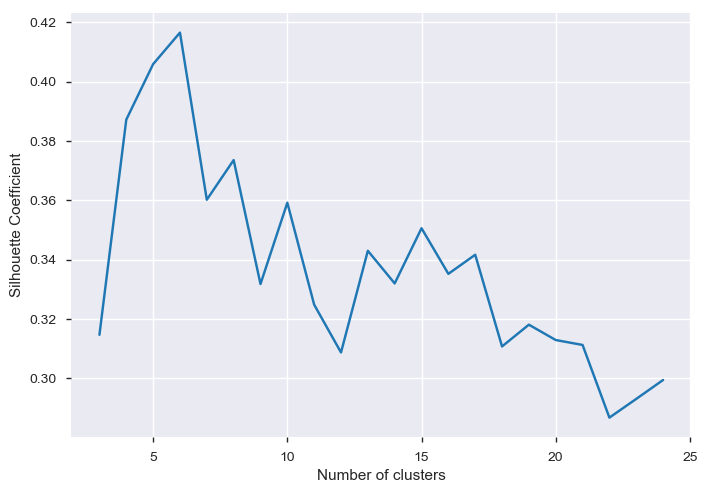

In [154]:
# plot the results
plt.plot(k_range, scores1)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

    We will be using Silhouette Coefficient to get the most scattered cluster i.e. least coeffient 
    to get the outliers.
    
    Here 23 touches the least coefficent.but to be precise need to analyze solution for 23 and 24 

#### CLluster 23 solution- 4 providers are into seperate clusters.

In [155]:
kmr_23=KMeans(n_clusters=23,random_state=123)
kmr_23.fit(reduced_cr_1)
kmr_23.labels_
pd.Series(kmr_23.labels_).value_counts()

17    51
0     41
10    32
3     23
7     22
2     19
4     15
22    15
16    12
9     11
11    10
12     9
20     9
8      8
13     6
15     5
18     5
1      5
14     4
21     1
6      1
5      1
19     1
dtype: int64

### Cluster 24 solution-3 providers are into sepearte cluster

In [156]:
kmr_24=KMeans(n_clusters=24,random_state=123)
kmr_24.fit(reduced_cr_1)
kmr_24.labels_
pd.Series(kmr_24.labels_).value_counts()

1     52
13    42
18    30
15    24
3     23
4     18
7     18
8     12
17    10
19     9
0      8
5      8
22     8
10     8
11     7
12     7
14     6
20     5
2      4
16     2
23     2
9      1
6      1
21     1
dtype: int64

Text(0.5, 0, 'PC_24')

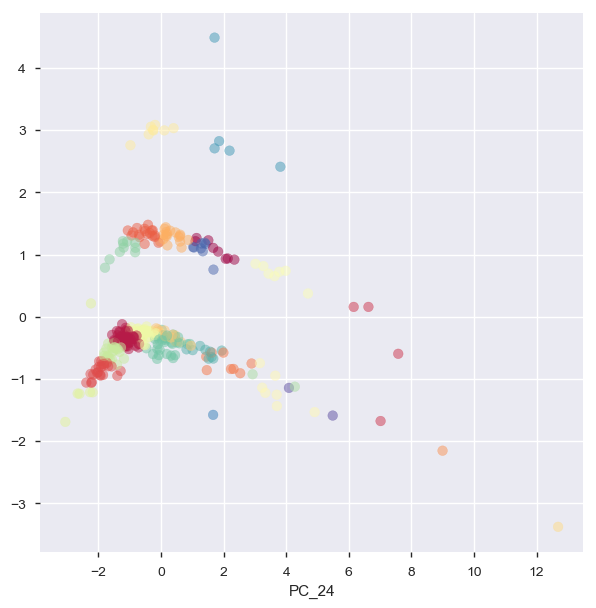

In [157]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr_1[:,0], reduced_cr_1[:,1], c=kmr_24.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_24')

In [158]:
cluster_df_24=pd.concat([Medicare_data_region, pd.Series(kmr_24.labels_, name='Cluster_24')], axis=1)

In [159]:
cluster_df_24.to_csv('cluster_df_24_region.csv')

### For region final solution is based on cluster 24 solution